
Logistic Regression Results
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0

Random Forest Results
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0


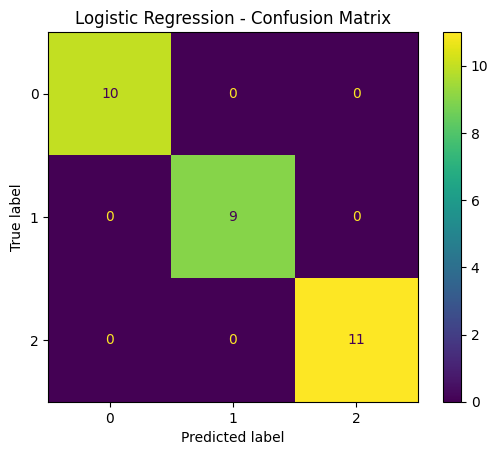

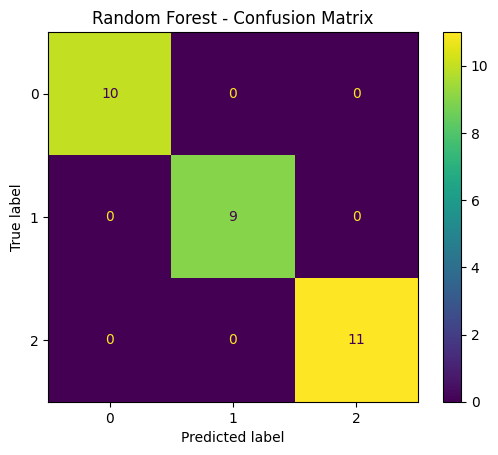

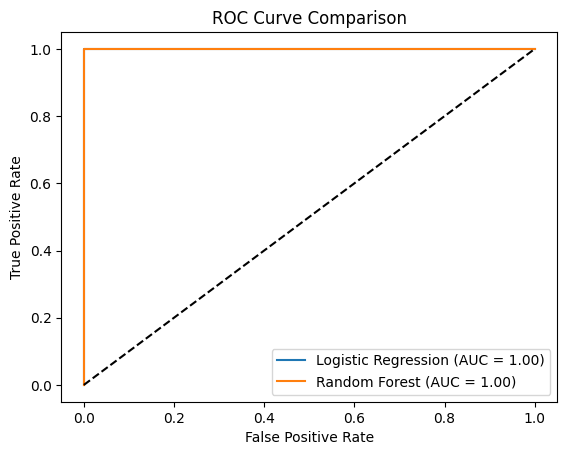

In [1]:
# ML Classification Project - Single Complete Code

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    ConfusionMatrixDisplay, roc_curve, auc
)

# Load Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Results")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='macro'))
    print("Recall   :", recall_score(y_true, y_pred, average='macro'))
    print("F1 Score :", f1_score(y_true, y_pred, average='macro'))

# Print Results
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Confusion Matrix - Logistic Regression
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# Confusion Matrix - Random Forest
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title("Random Forest - Confusion Matrix")
plt.show()

# ROC Curve (Multiclass)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Logistic Regression ROC
y_score_lr = lr.predict_proba(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test_bin.ravel(), y_score_lr.ravel())
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Random Forest ROC
y_score_rf = rf.predict_proba(X_test)
fpr_rf, tpr_rf, _ = roc_curve(y_test_bin.ravel(), y_score_rf.ravel())
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curves
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()
